In [2]:
#Importar la informacion de listado de especificaciones técnicas
import numpy as np
import pandas as pd

archivo = pd.read_excel("listado de especificaciones para proyecto.xlsx", sheet_name= "Especificaciones sin código ine")
medicamentos = archivo
medicamentos.head(7)



,Responsable,Renglón,Cód-INE,NOMBRE,CARACTERÍSTICAS SOLICITADAS,Presentación,CANTIDAD ESTIMADA 24 MESES MSPAS,VIA DE ADMINISTRACIÓN,UNIDAD DE MEDIDA,RENGLÓN,AREA,CORRELATIVO,RUBRO,REQUIERE REGISTRA SANITARIO,Observaciones
0,dANY,1,475-016,Sevoflurano 100%,100%. Solución para inhalación. Frasco 250 ml....,Frasco,13400,INHALATORIA,Unidad,266,4,41,ANESTESICOS GENERALES Y/O INDUCTORES,SI,NaN
1,dANY,2,476-028,Isoflurano 100%,100%. Solución para inhalación. Frasco 100-250...,Frasco,700000,INHALATORIA,Mililitro,266,4,81,ANESTESICOS GENERALES Y/O INDUCTORES,SI,NaN
2,dANY,3,477-016,Desflurano 100%,100%. Solución para inhalación. Frasco 240 ml....,Frasco,1100,INHALATORIA,Unidad,266,4,221,ANESTESICOS GENERALES Y/O INDUCTORES,SI,NaN
3,dANY,4,024-056,Ketamina 500mg/10ml,50 mg/ml. Solución inyectable. Vial 10 ml. Cot...,Vial,37800,INTRAVENOSA-INTRAMUSCULAR,Unidad,266,4,244,ANESTESICOS GENERALES Y/O INDUCTORES,SI,NaN
4,dANY,5,028-024,Propofol 500 mg/ 50 ml,"10 mg/ml. Emulsión inyectable, Jeringa prellen...",Jeringa prellenada,30100,INTRAVENOSA,Unidad,266,4,252,ANESTESICOS GENERALES Y/O INDUCTORES,SI,NaN
5,NaN,5,266-005-056,Propofol 500 mg/ 50 ml,"10 mg/ml. Emulsión inyectable, Jeringa prellen...",Vial,30100,INTRAVENOSA,Unidad,266,4,252,ANESTESICOS GENERALES Y/O INDUCTORES,SI,NaN
6,dANY,6,266-006-001,Bupivacaina Clorhidrato sin Epinefrina sin pre...,0.50%. Solución inyectable. Vial o ampolla 10 ...,Ampolla,52500,EPIDURAL,Unidad,266,5,21,ANASTESICOS LOCALES,SI,NaN


In [4]:
#Convertir características solicitadas a una lista
lista_medicamentos = medicamentos["CARACTERÍSTICAS SOLICITADAS"].tolist()

In [9]:
nombre_medicamentos = medicamentos["NOMBRE"].tolist()

In [22]:
import re

def clean_medicamento(nombre):
    nombre_limpio = re.sub(r'\d+', '', nombre)  # Elimina números
    nombre_limpio = re.sub(r'\s+', ' ', nombre_limpio)  # Elimina espacios en exceso
    nombre_limpio = re.sub(r'%|/|mg|ml|mI', '', nombre_limpio, flags=re.IGNORECASE)  # Elimina %, /, mg y ml

    return nombre_limpio.strip()

In [23]:
medicamentos_limpio = [clean_medicamento(med) for med in nombre_medicamentos]


In [26]:
print(len(medicamentos_limpio))
print(len(lista_medicamentos))

94
94


In [47]:
textos_medicamentos = [f'{elem1} {elem2}' for elem1, elem2 in zip(medicamentos_limpio, lista_medicamentos)]

In [52]:
medicamentos_df = pd.DataFrame(textos_medicamentos)
medicamentos_df[["Presentacion","UNIDAD DE MEDIDA"]] = medicamentos[["Presentación","UNIDAD DE MEDIDA"]]
medicamentos_df.columns = ['Medicamentos', 'Presentacion','Unidad de Medida']
medicamentos_df

,Medicamentos,Presentacion,Unidad de Medida
0,Sevoflurano 100%. Solución para inhalación. Fr...,Frasco,Unidad
1,Isoflurano 100%. Solución para inhalación. Fra...,Frasco,Mililitro
2,Desflurano 100%. Solución para inhalación. Fra...,Frasco,Unidad
3,Ketana 50 mg/ml. Solución inyectable. Vial 10 ...,Vial,Unidad
4,"Propofol 10 mg/ml. Emulsión inyectable, Jering...",Jeringa prellenada,Unidad
...,...,...,...
89,Diazepam 5 mg/ml. Solución inyectable. Ampoll...,Ampolla,Unidad
90,Lorazepam 2 mg/ml. Solución inyectable. Ampoll...,Ampolla,Unidad
91,Surfactante Pulmonar (natural) 80 mg/1 mL. Sus...,Vial,Unidad
92,Surfactante Pulmonar (natural) 25mg/mL. Suspen...,Vial,Unidad


In [60]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.metrics import jaccard_distance
from itertools import combinations
from collections import defaultdict

nltk.download('punkt')
nltk.download('stopwords')

# Lista de párrafos de ejemplo
#lista_medicamentos

# Preparación de texto: tokenización, eliminación de stopwords y stemming
def preparacion_texto(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalnum()]
    stopwords_set = set(stopwords.words("spanish"))
    tokens = [token for token in tokens if token not in stopwords_set]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens

# Calcula la distancia de Jaccard entre dos listas de tokens
def jaccard_similarity(tokens1, tokens2):
    set1 = set(tokens1)
    set2 = set(tokens2)
    return 1 - jaccard_distance(set1, set2)

# Calcula las similitudes entre todos los pares de párrafos
similitudes = defaultdict(list)

textos_medicamentos = medicamentos_df["Medicamentos"]

for i, j in combinations(range(len(textos_medicamentos)), 2):
    tokens_i = preparacion_texto(textos_medicamentos[i])
    tokens_j = preparacion_texto(textos_medicamentos[j])
    similares = jaccard_similarity(tokens_i, tokens_j)
    similitudes[i].append((j, similares))
    similitudes[j].append((i, similares))

# Agrupa los párrafos basados en similitud
grupos = []
visitados = set()
for i in range(len(textos_medicamentos)):
    if i not in visitados:
        grupo = [i]
        visitados.add(i)
        for j, similares in sorted(similitudes[i], key=lambda x: x[1], reverse=True):
            if j not in visitados:
                grupo.append(j)
                visitados.add(j)
            if len(grupo) == 3:
                break
        grupos.append(grupo)


salida_data = []

# Imprime los grupos resultantes
for grupo in grupos:
    grupo_texto = [textos_medicamentos[idx] for idx in grupo]
    salida_data.append(grupo_texto)
    

columnas_salida = ["Grupo_" + str(i+1) for i in range(3)]
salida_df = pd.DataFrame(salida_data, columns=columnas_salida)    

# Imprimir el DataFrame de salida
print(salida_df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\preciosreferencia_1\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\preciosreferencia_1\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!


                                              Grupo_1   
0   Sevoflurano 100%. Solución para inhalación. Fr...  \
1   Ketana 50 mg/ml. Solución inyectable. Vial 10 ...   
2   Propofol 10 mg/ml. Emulsión inyectable, Jering...   
3   Bupivacaina Pesada (Hiperbárica) . 0.50%. Solu...   
4   Lidocaina Clorhidrato Con Epinefrina sin Prese...   
5   Lidocaina dental sin Epinefrina 2%. Solución i...   
6   Carbamazepina 200 mg. Tableta/Comprimido o Tab...   
7   Fenitoina sódica (Difenilhidantoína sódica) 10...   
8   Ácido Valproico 100 mg/ml. Solución Inyectable...   
9   Ácido Valproico (valproato sódico) 250 mg/5mI....   
10  Fenobarbital 100 mg. Tableta/Comprimido. Blist...   
11  Carbonato de Litio 300 mg. Tableta/Comprimido ...   
12  Flumazenil . 0.1mg/ml. Solución Inyectable. Am...   
13  Deferasirox 250 mg.  Tableta dispersable/Compr...   
14  Biperideno Clorhidrato 2 mg. Tableta/Comprimid...   
15  Agua estéril para inyección (agua tridestilada...   
16  Cloruro de Sodio ., 0.9%. S

In [61]:
salida_df

,Grupo_1,Grupo_2,Grupo_3
0,Sevoflurano 100%. Solución para inhalación. Fr...,Isoflurano 100%. Solución para inhalación. Fra...,Desflurano 100%. Solución para inhalación. Fra...
1,Ketana 50 mg/ml. Solución inyectable. Vial 10 ...,Magnesio Sulfato 50%. Solución Inyectable. A...,"Propofol 10 mg/ml. Emulsión inyectable, Jering..."
2,"Propofol 10 mg/ml. Emulsión inyectable, Jering...",Bupivacaina Clorhidrato sin Epinefrina sin pre...,Fenitoina sódica (Difenilhidantoína sódica) 50...
3,Bupivacaina Pesada (Hiperbárica) . 0.50%. Solu...,Naloxona . 0.4 mg/ml. Solución inyectable. Amp...,Ambroxol 7.5 mg/ml. Solución inyectable. Ampol...
4,Lidocaina Clorhidrato Con Epinefrina sin Prese...,Lidocaina Clorhidrato sin Epinefrina con prese...,"Lidocaina Clorhidrato sin Epinefrina, sin pres..."
5,Lidocaina dental sin Epinefrina 2%. Solución i...,"Lidocaina dental con Epinefrina y :, 2% y 1:1...",Lorazepam 2 mg/ml. Solución inyectable. Ampoll...
6,Carbamazepina 200 mg. Tableta/Comprimido o Tab...,Carbamazepina 400 mg. Tableta/Comprimido o Tab...,Lamotrigina 100 mg. Tableta/Comprimido o Table...
7,Fenitoina sódica (Difenilhidantoína sódica) 10...,Clorpromazina 100 mg. Tableta/Comprimido o Tab...,Gabapentina 400 mg. Tableta/Comprimido o Table...
8,Ácido Valproico 100 mg/ml. Solución Inyectable...,Cloruro de Sodio . 0.9% Solución inyectable. M...,Fenobarbital 100 mg/ml. Solución inyectable. A...
9,Ácido Valproico (valproato sódico) 250 mg/5mI....,Ácido Valproico (valproato sódico) 500 mg. Tab...,Guayacolato de Glicerilo 100 mg/5 ml. Jarabe. ...


In [62]:
salida_df.to_excel("archivo_salida.xlsx", sheet_name="Hoja1", index=False)


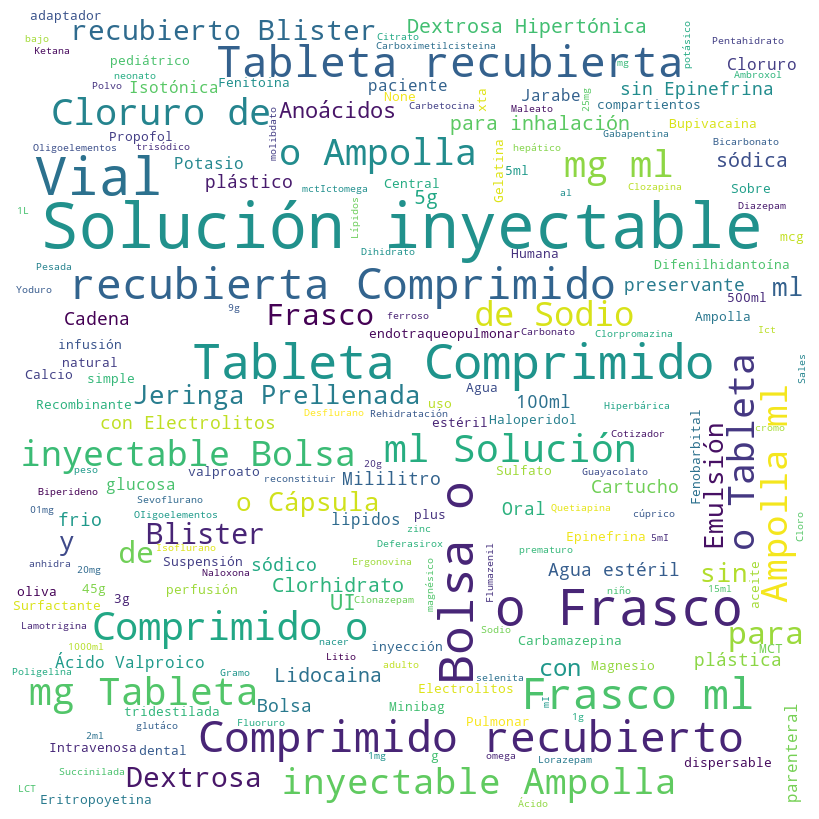

In [75]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

texto = ' '.join([str(row) for row in salida_df['Grupo_1']]) + ' ' + \
        ' '.join([str(row) for row in salida_df['Grupo_2']]) + ' ' + \
        ' '.join([str(row) for row in salida_df['Grupo_3']])

stopwords = set(STOPWORDS)
stopwords.update(['cotizar', 'por', 'cotizar por'])

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(texto)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
